In [0]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df= pd.read_csv('names.csv',names= ['girls','boys'], sep= ',')
df=df[0:991]
df.head()

,girls,boys
0,Emma,Liam
1,Olivia,Noah
2,Ava,William
3,Isabella,James
4,Sophia,Oliver


In [0]:
dict_girls1=dict.fromkeys(string.ascii_lowercase, 0)
dict_boys1=dict.fromkeys(string.ascii_lowercase, 0)


In [0]:
# Frequency of alphabets in each variable
for column in df.columns:
  for i in range(len(df)):
    letters= list(df[column][i])
    for alphabet in letters:
      if(column== 'girls'):
        dict_girls1[alphabet.lower()]= dict_girls1[alphabet.lower()]+1
      else:
        dict_boys1[alphabet.lower()]= dict_boys1[alphabet.lower()]+1



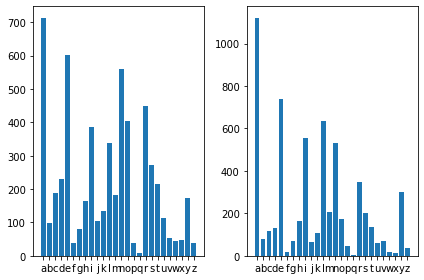

In [157]:
plt.subplot(1,2,1)
plt.bar(dict_boys1.keys(),dict_boys1.values())
plt.subplot(1,2,2)
plt.bar(dict_girls1.keys(),dict_girls1.values())
plt.tight_layout()

In [0]:
# There seem to be no pattern in term of alphabets frequency hecne we will use a different approach

In [0]:
dict_girls=dict.fromkeys(string.ascii_lowercase, dict.fromkeys(string.ascii_lowercase,0))
dict_boys=dict.fromkeys(string.ascii_lowercase, dict.fromkeys(string.ascii_lowercase,0))

In [0]:
# Count how many names start with a given alpahbet and end with any alphabets.
def get_data(df):
  dict_girls=dict.fromkeys(string.ascii_lowercase, dict.fromkeys(string.ascii_lowercase,0))
  dict_boys=dict.fromkeys(string.ascii_lowercase, dict.fromkeys(string.ascii_lowercase,0))
  for column in df.columns:
    for i in range(len(df)):
      letters= list(df[column][i])
      for alphabet in letters:
        if(column== 'girls'):
          last_letter = letters[len(letters)-1]
          dict_girls[alphabet.lower()][last_letter] = dict_girls[alphabet.lower()][last_letter]+1
        else:
          last_letter = letters[len(letters)-1]
          dict_boys[alphabet.lower()][last_letter] = dict_boys[alphabet.lower()][last_letter]+1
  return dict_boys,dict_girls



In [0]:
def Who_r_u(name, dict_boys=None , dict_girls=None):

  """
Name --> Whose gender is to be predicted
dict_boy --> dictionary that stores ratio of starting alphabets to ending alphabets in boys name
dict_girl --> dictionary that stores ratio of starting alphabets to ending alphabets in girls name

We have considered prob of being boy or girl in the population to be 0.5 hence there is no 
need to include them
"""
  dict_boys, dict_girls = get_data(df)



  options = ['boy','girl']
  letter = list(name.lower())
  first_alphabet = letter[0]
  last_alphabet = letter[len(name)-1]
  prob_given_boy = dict_boys[first_alphabet][last_alphabet]
  prob_given_girl = dict_girls[first_alphabet][last_alphabet]
  if(prob_given_boy > prob_given_girl):
    return options[0]
  else:
    return options[1]



In [178]:
Who_r_u("juelz")

'boy'